# Questionair Responses

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfItalian = pd.read_csv("CAPABLE_Questionair_Behaviourl_Models_ItalianVersion.csv")

In [3]:
dfEnglish = pd.read_csv("CAPABLE_Questionair_Behaviourl_Models_EnglishVersion.csv")

In [4]:
dfItalian.columns = dfEnglish.columns

In [5]:
Both_DFs = pd.concat([dfEnglish, dfItalian])

In [6]:
# Both_DFs.to_csv("CAPABLE_Questionair_Behaviourl_Models.csv")

In [7]:
len(list(dfEnglish.columns.values))

47

In [8]:
dfEnglish.columns.values

array(['Timestamp',
       'Do you agree that your answers will be used for research purposes? ',
       'You identify yourself as:', 'Age', 'Nationality',
       'Have you been diagnosed with cancer? ',
       'Select a simple activity that you would be happy to perform to improve your wellbeing.  Consider this activity when answering later questions in this survey. ',
       'I feel motivated to perform activities that I perceive having benefit to my health and well-being',
       'When I had a good night sleep I feel more motivated to perform activities that benefit my health (make an extra effort) ',
       'My family members motivate me to look after my health',
       'When I am in a good mood I am  motivated to perform activities that benefit my health',
       'When I feel low I cannot be convinced to perform any activities that are not a part of my normal daily schedule',
       'Before the visit to my doctor, I tend to be more compliant with my health recommendations',
      

In [9]:
len(list(dfItalian.columns.values))

47

In [10]:
dfItalian.columns.values

array(['Timestamp',
       'Do you agree that your answers will be used for research purposes? ',
       'You identify yourself as:', 'Age', 'Nationality',
       'Have you been diagnosed with cancer? ',
       'Select a simple activity that you would be happy to perform to improve your wellbeing.  Consider this activity when answering later questions in this survey. ',
       'I feel motivated to perform activities that I perceive having benefit to my health and well-being',
       'When I had a good night sleep I feel more motivated to perform activities that benefit my health (make an extra effort) ',
       'My family members motivate me to look after my health',
       'When I am in a good mood I am  motivated to perform activities that benefit my health',
       'When I feel low I cannot be convinced to perform any activities that are not a part of my normal daily schedule',
       'Before the visit to my doctor, I tend to be more compliant with my health recommendations',
      

In [11]:
np.unique(list(Both_DFs['Nationality'].values))

array([' Israelì', 'American', 'Australia and Sri Lanka', 'Belarus',
       'Belarusian', 'British', 'Dutch', 'European', 'German',
       'Hungarian ', 'IL', 'IT', 'ITALIAN', 'Israel', 'Israel ',
       'Israeli', 'Israely', 'Isreal', 'Italia', 'Italia ', 'Italian',
       'Italian ', 'Italiana', 'Italy', 'Latvian', 'Netherlands', 'PL',
       'Pakistan', 'Poland', 'Polish', 'Polish ', 'Slovak', 'Spanish',
       'Switzerland ', 'UK', 'Zimbabwe ', 'argentina', 'irish', 'israel',
       'israeli', 'ita', 'italian', 'italiana', 'italiano', 'nan',
       'polish'], dtype='<U32')

## Age

<AxesSubplot:ylabel='Timestamp'>

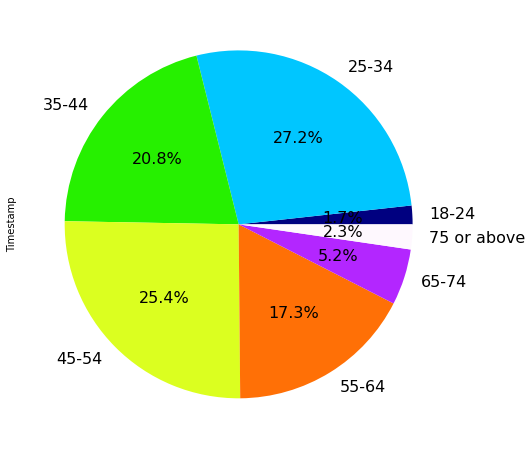

In [12]:
Both_DFs.groupby(['Age']).count().plot(kind='pie', y='Timestamp',  autopct='%1.1f%%',figsize=(8,8),fontsize=16, legend=False, colormap="gist_ncar") #.legend(loc='center left', fontsize=16)

## Notifications

In [13]:
na = 'How many daily reminders for health-related activities would you be willing to receive? '

In [15]:
def italian2englishTrigger(activity):
    if activity is np.nan:
        return activity
    elif '3' in activity:
        return 'No more than 3'
    elif '2' in activity:
        return 'No more than 2'
    elif '1' in activity:
        return 'No more than 1'
    else:
        return activity

In [16]:
Both_DFs[na] = Both_DFs.apply(lambda row : italian2englishTrigger(row[na]), axis = 1)

<AxesSubplot:ylabel='Timestamp'>

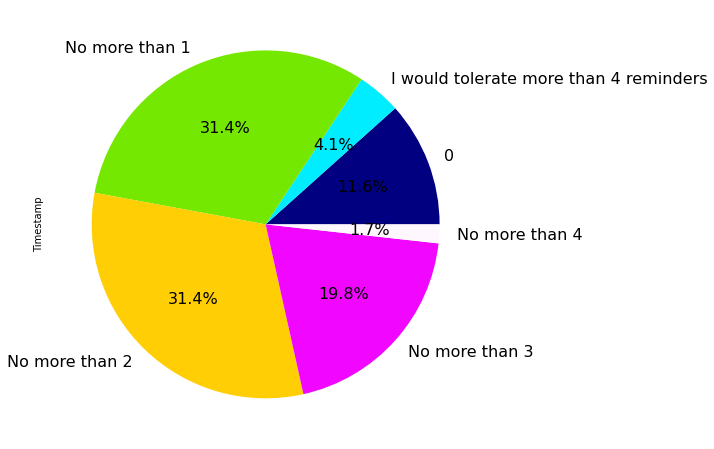

In [17]:
Both_DFs.groupby([na]).count().plot(kind='pie', y='Timestamp',  autopct='%1.1f%%',figsize=(8,8),fontsize=16, legend=False, colormap="gist_ncar") #.legend(loc='center left', fontsize=16)

## Activity

In [14]:
np.unique(list(Both_DFs['Select a simple activity that you would be happy to perform to improve your wellbeing.  Consider this activity when answering later questions in this survey. '].values))

array(['a walk in nature (30 minutes)',
       'deep breathing exercise (5 minutes)',
       'diario della gratitudine (scrivi 3 cose per cui sei grato oggi)',
       'garden bowl (innaffiare/prendersi cura di una pianta)',
       'garden bowl (watering/caring for a plant)',
       'gratitude journal (write down 3 things you are grateful for today)',
       'imagery training (visualize yourself healthy and happy)', 'nan',
       'photo collage', 'tai chi (5 minutes)',
       'una passeggiata nella natura (30 minuti)'], dtype='<U66')

In [15]:
def italian2english(activity):
    if activity is np.nan:
        return activity
    elif 'passeggiata' in activity:
        return 'a walk in nature (30 minutes)'
    elif 'garden bowl ' in activity:
        return 'garden bowl (watering/caring for a plant)'
    elif 'diario' in activity:
        return 'gratitude journal (write down 3 things you are grateful for today)'
    else:
        return activity

In [16]:
q = 'Select a simple activity that you would be happy to perform to improve your wellbeing.  Consider this activity when answering later questions in this survey. '

In [17]:
Both_DFs[q] = Both_DFs.apply(lambda row : italian2english(row[q]), axis = 1)

<AxesSubplot:ylabel='Timestamp'>

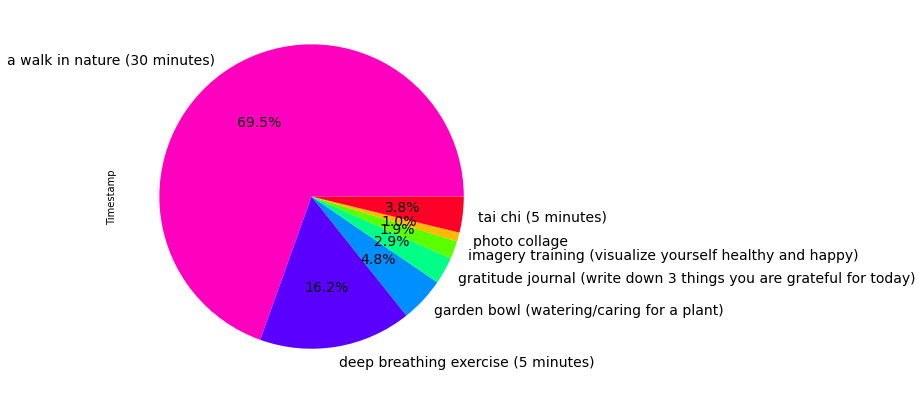

In [18]:
Both_DFs.groupby(['Select a simple activity that you would be happy to perform to improve your wellbeing.  Consider this activity when answering later questions in this survey. ']).count().plot(kind='pie', y='Timestamp',  autopct='%1.1f%%',figsize=(7,7),fontsize=14, legend=False, colormap="gist_rainbow_r") #.legend(loc='center left', fontsize=16)